int row={2,5,4,3};       
int col={5,4,3,7};

q. Find the sequence which requires least amount of multiplications

for two matrices of size p*q and q*r

they are multipliable only because q is common among them

There will be p*q*r operations

for ex.  
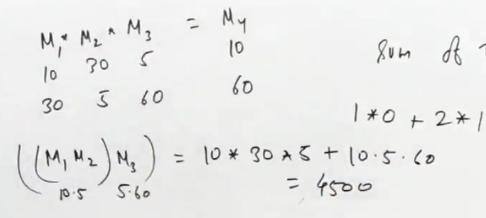

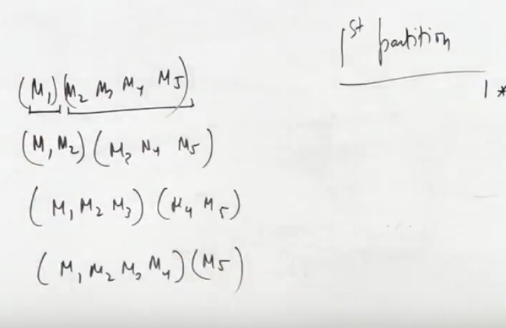

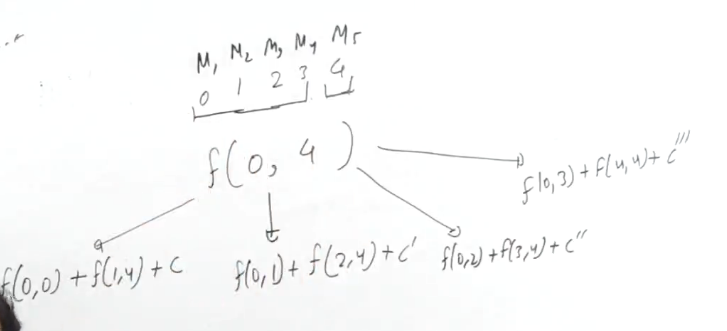

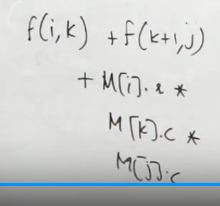

doubt

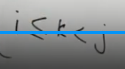

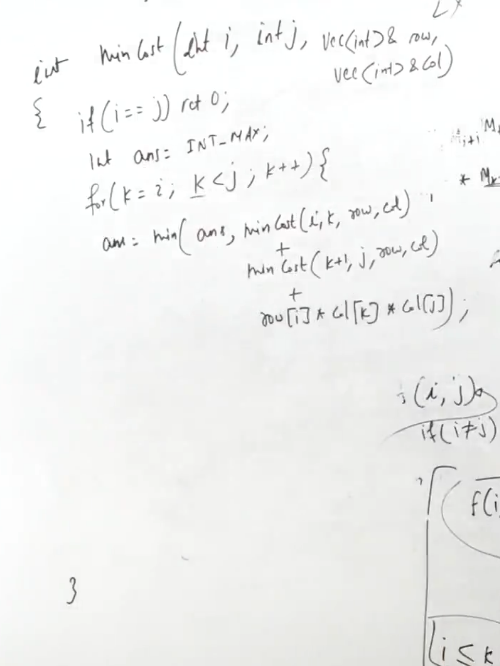

https://practice.geeksforgeeks.org/problems/matrix-chain-multiplication0303/1

input in gfg  
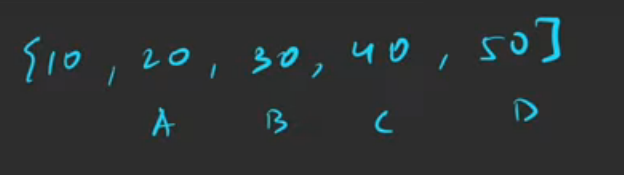  
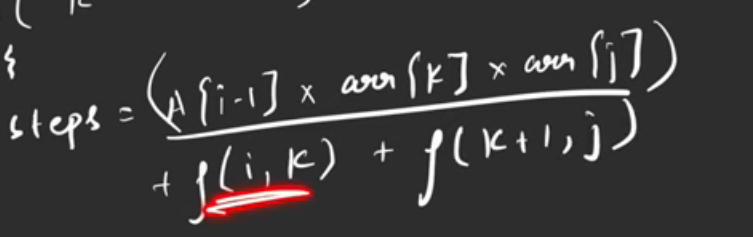

In [ ]:
class Solution{
    public:
    
        int f(int v[], int i, int j){
            if(i==j) return 0;
            int ans=INT_MAX;
            for(int k=i;k<j;k++){
                ans=min(ans,f(v,i,k)+f(v,k+1,j)+v[i-1]*v[k]*v[j]);
            }
            return ans;
        }
    
        int matrixMultiplication(int n, int v[]){
            return f(v,1,n-1);
        }
    };

there are n-1 matrices

In [ ]:
class Solution{
    public:
    
        int f(int v[], int i, int j,vector<vector<int>> &mem){
            if(i==j) return 0;
            if(mem[i][j]!=-1) return mem[i][j];
            int ans=INT_MAX;
            for(int k=i;k<j;k++){
                ans=min(ans,f(v,i,k,mem)+f(v,k+1,j,mem)+v[i-1]*v[k]*v[j]);
            }
            return mem[i][j]=ans;
        }
    
        int matrixMultiplication(int n, int v[]){
            vector<vector<int>> mem(n,vector<int>(n,-1));
            return f(v,1,n-1,mem);
        }
    };

In [ ]:
//c++ bottom up

q.        
https://leetcode.com/problems/stone-game-v/description/

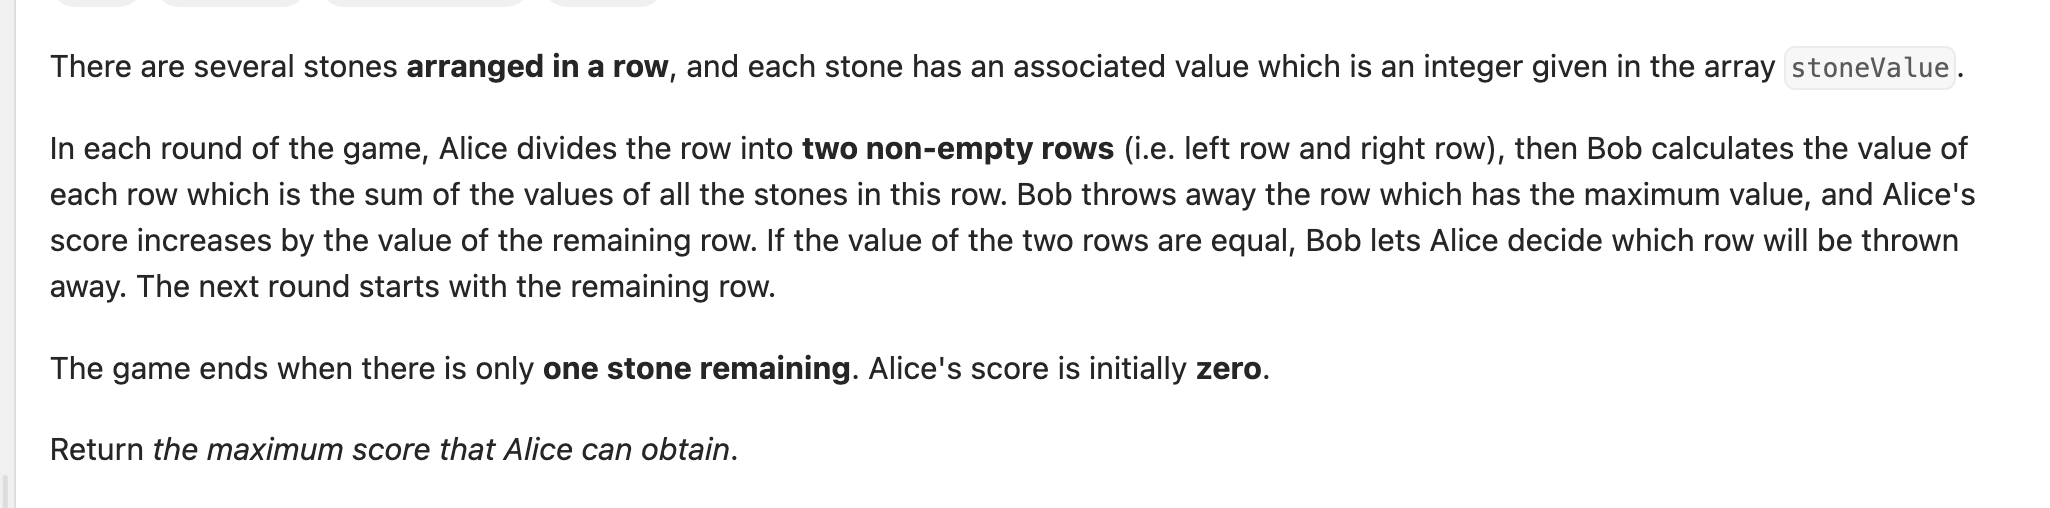

In [ ]:
class Solution {
    public:
            int f(int i, int j, vector<int> &v, vector<vector<int>> &mem){
                if(i==j) return 0;
                if(mem[i][j]!=-1) return mem[i][j];
                int sumOfArr=accumulate(v.begin()+i,v.begin()+j+1,0);
                int lSum=0,rSum=sumOfArr;
                int ans=0;
                for(int k=i;k<j;k++){
                    lSum+=v[k];
                    rSum-=v[k];
                    if(lSum<rSum) ans=max(ans,lSum+f(i,k,v,mem));
                    if(lSum==rSum) ans=max(ans,lSum+max(f(i,k,v,mem),f(k+1,j,v,mem)));
                    if(lSum>rSum) ans=max(ans,rSum+f(k+1,j,v,mem));
                }
                return mem[i][j]=ans;
            }   
    
    
            int stoneGameV(vector<int>& v) {
                int n=v.size();
                vector<vector<int>> mem(n,vector<int>(n,-1));
                return f(0,n-1,v,mem);
            }
};

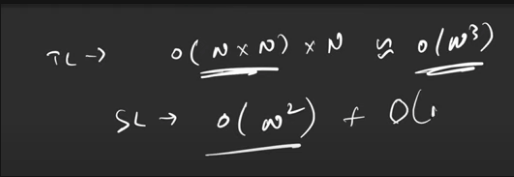

Its bottom up solution gives rise to the third type

In [ ]:
class Solution {
    public:
        int stoneGameV(vector<int>& prefixSum){
            int n=prefixSum.size();
            if(n==1)return 0;
            for(int i=1;i<n;i++)prefixSum[i]+=prefixSum[i-1];
    
            vector<vector<int>>dp(n,vector<int>(n,0));
            for(int i=0;i<n;i++) dp[i][i]=0;
            
            for(int len=2;len<=n;len++){
                for(int s=0;s+len-1<n;s++){
                    int e=s+len-1;
                    int ans=0;
                    for(int splitPoint=s;splitPoint<e;splitPoint++){
                            int lSum=prefixSum[splitPoint];
                            if(s-1>=0)lSum-=prefixSum[s-1];
                            int rSum=prefixSum[e];
                            rSum-=prefixSum[splitPoint];
                            if(lSum<rSum){
                                ans=max(ans,lSum+dp[s][splitPoint]);
                            }
                            else if(rSum<lSum){
                                ans=max(ans,rSum+dp[splitPoint+1][e]);
                            }
                            else{
                                ans=max(ans,lSum+max(dp[s][splitPoint],dp[splitPoint+1][e]));
                            }
                    }
                    dp[s][e]=ans;         
                }
            }
            return dp[0][n-1];            
        }
    };

For matrix multiplication  
https://practice.geeksforgeeks.org/problems/matrix-chain-multiplication0303/1

In [ ]:

class Solution {
    public:
  
      int matrixMultiplication(vector<int> &v) {
          int n=v.size();
          vector<vector<int>> dp(n,vector<int>(n,0));
          for(int i=1;i<n;i++) dp[i][i]=0;
        
          //All the len 1 are already filled 
          for(int len=2;len<=n-1;len++){
              for(int s=1;s+len-1<n;s++){
                  int e=s+len-1;
                  int ans=INT_MAX;
                  for(int splitPoint=s;splitPoint<e;splitPoint++){
                      ans=min(ans,dp[s][splitPoint]+dp[splitPoint+1][e]+v[s-1]*v[splitPoint]*v[e]);
                  }
                  dp[s][e]=ans;         
              }
          }
          return dp[1][n-1];
      }
  };

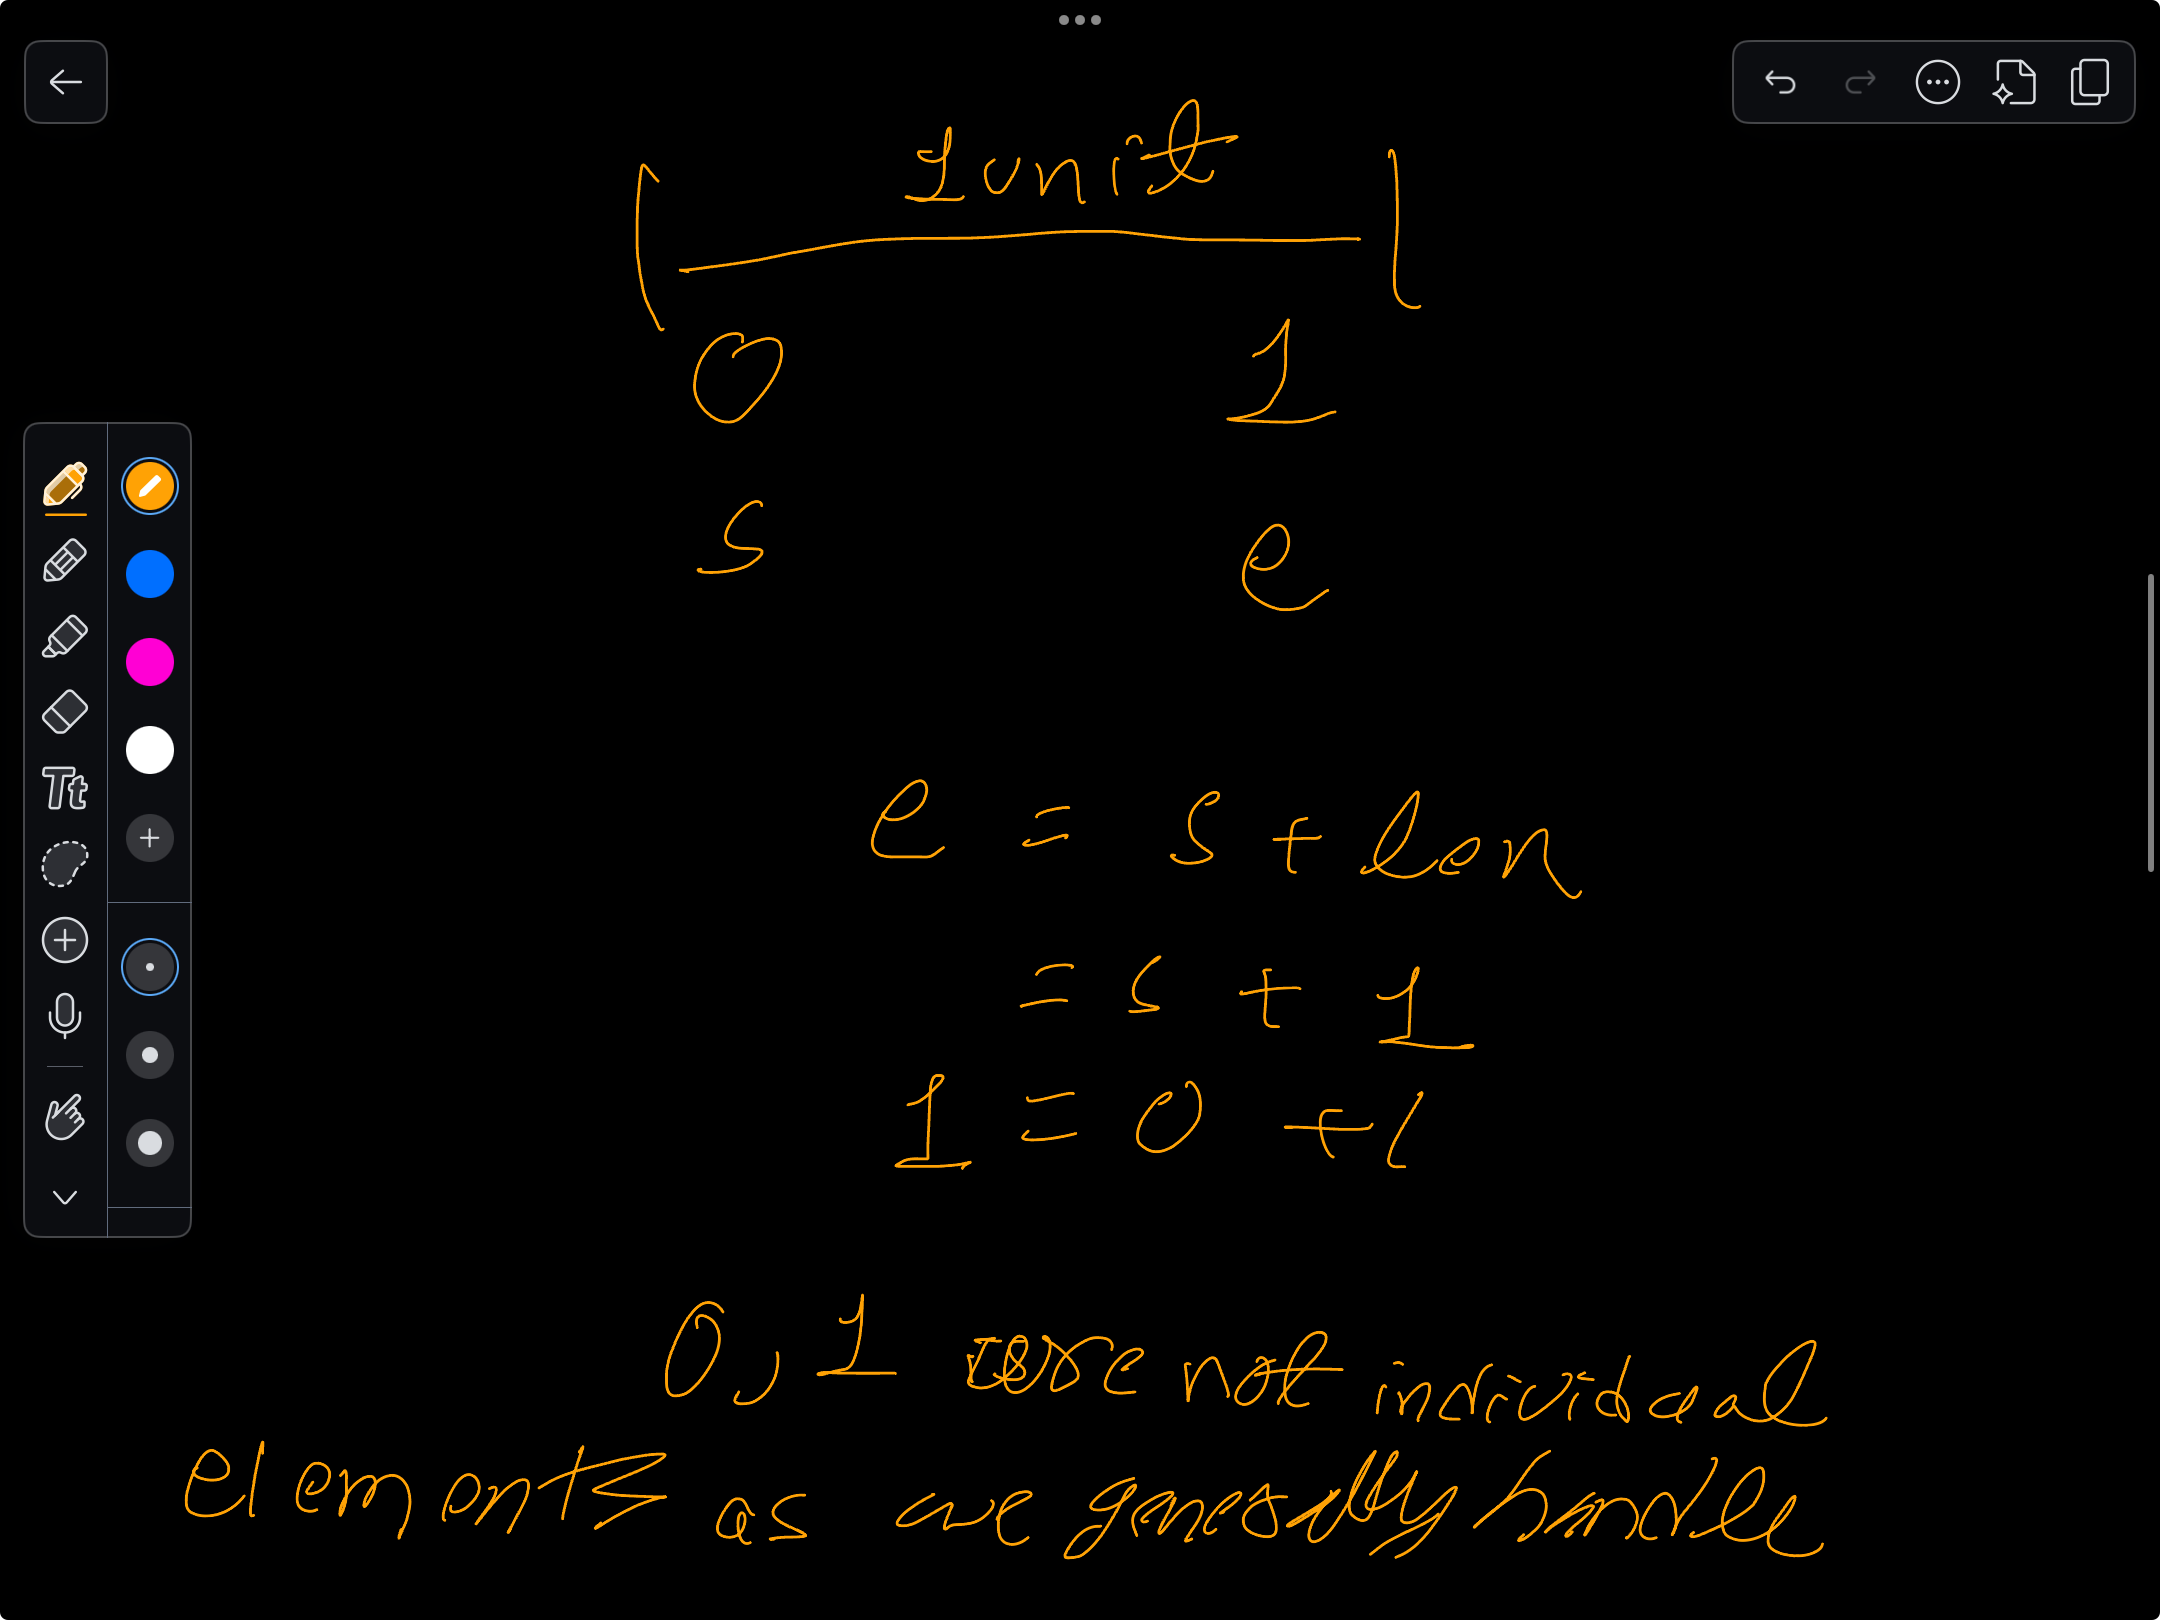

In [ ]:
//archieved
//dp[i][j]
//dp[i][j]=0 if i==j
//dp[1][n-1]
class Solution{
    public:
        int matrixMultiplication(int n, int v[]){
            n--;
            vector<vector<int>> dp(n,vector<int>(n));
            for(int i=0;i<n;i++) dp[i][i]=0;
            for(int d=1;d<n;d++){
                int i=0,j=d;
                while(i<n and j<n){
                    dp[i][j]=INT_MAX;
                    for(int k=i;k<j;k++)
                        dp[i][j]=min(dp[i][j],dp[i][k]+dp[k+1][j]+v[i]*v[k+1]*v[j+1]);
                    i++;
                    j++;
                }
            }
            return dp[0][n-1];
        }
    };

https://leetcode.com/problems/minimum-cost-to-cut-a-stick

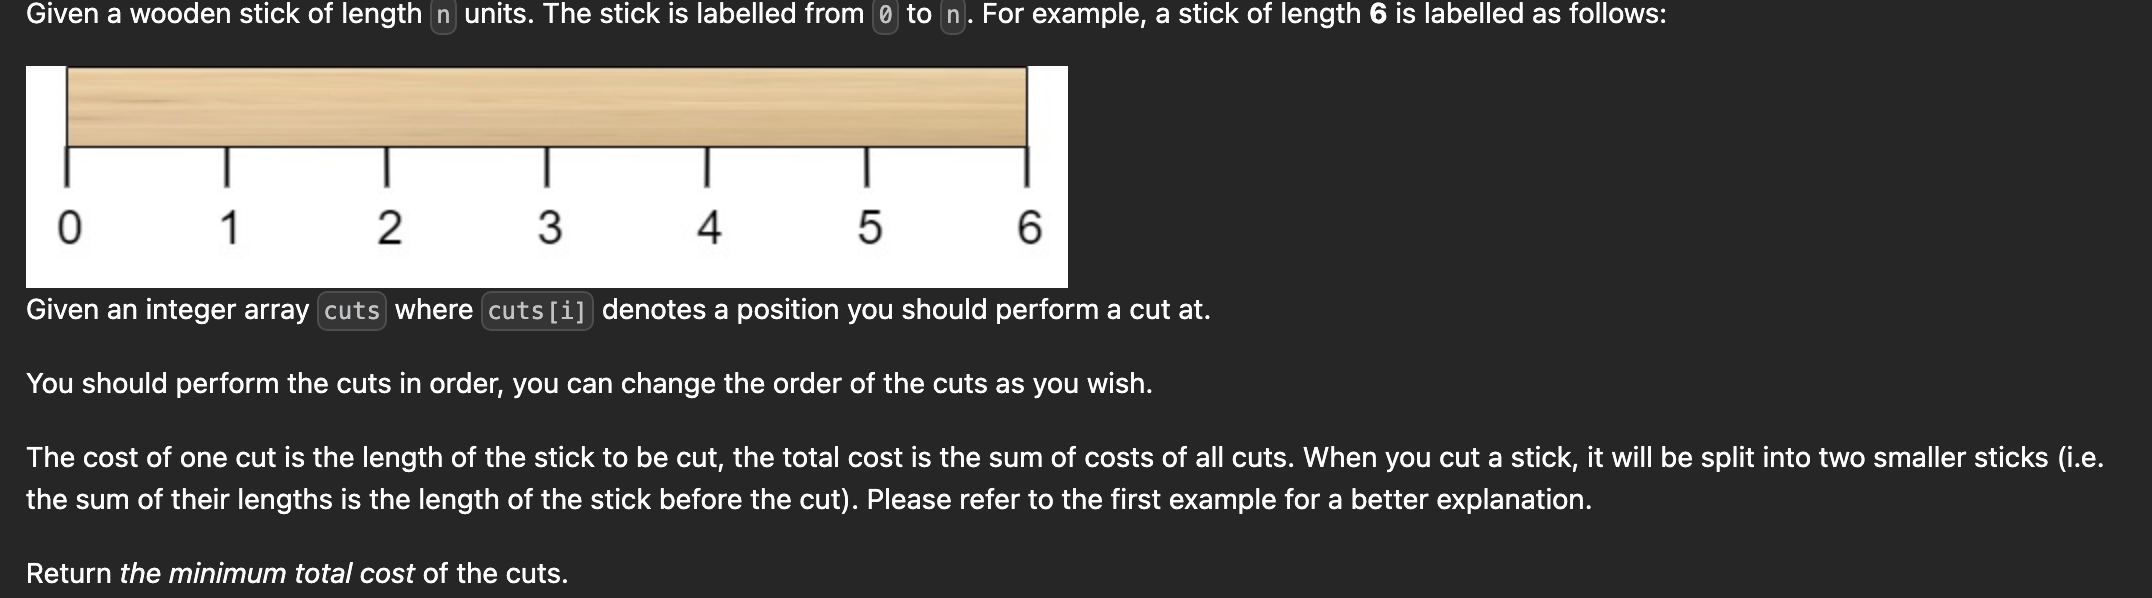

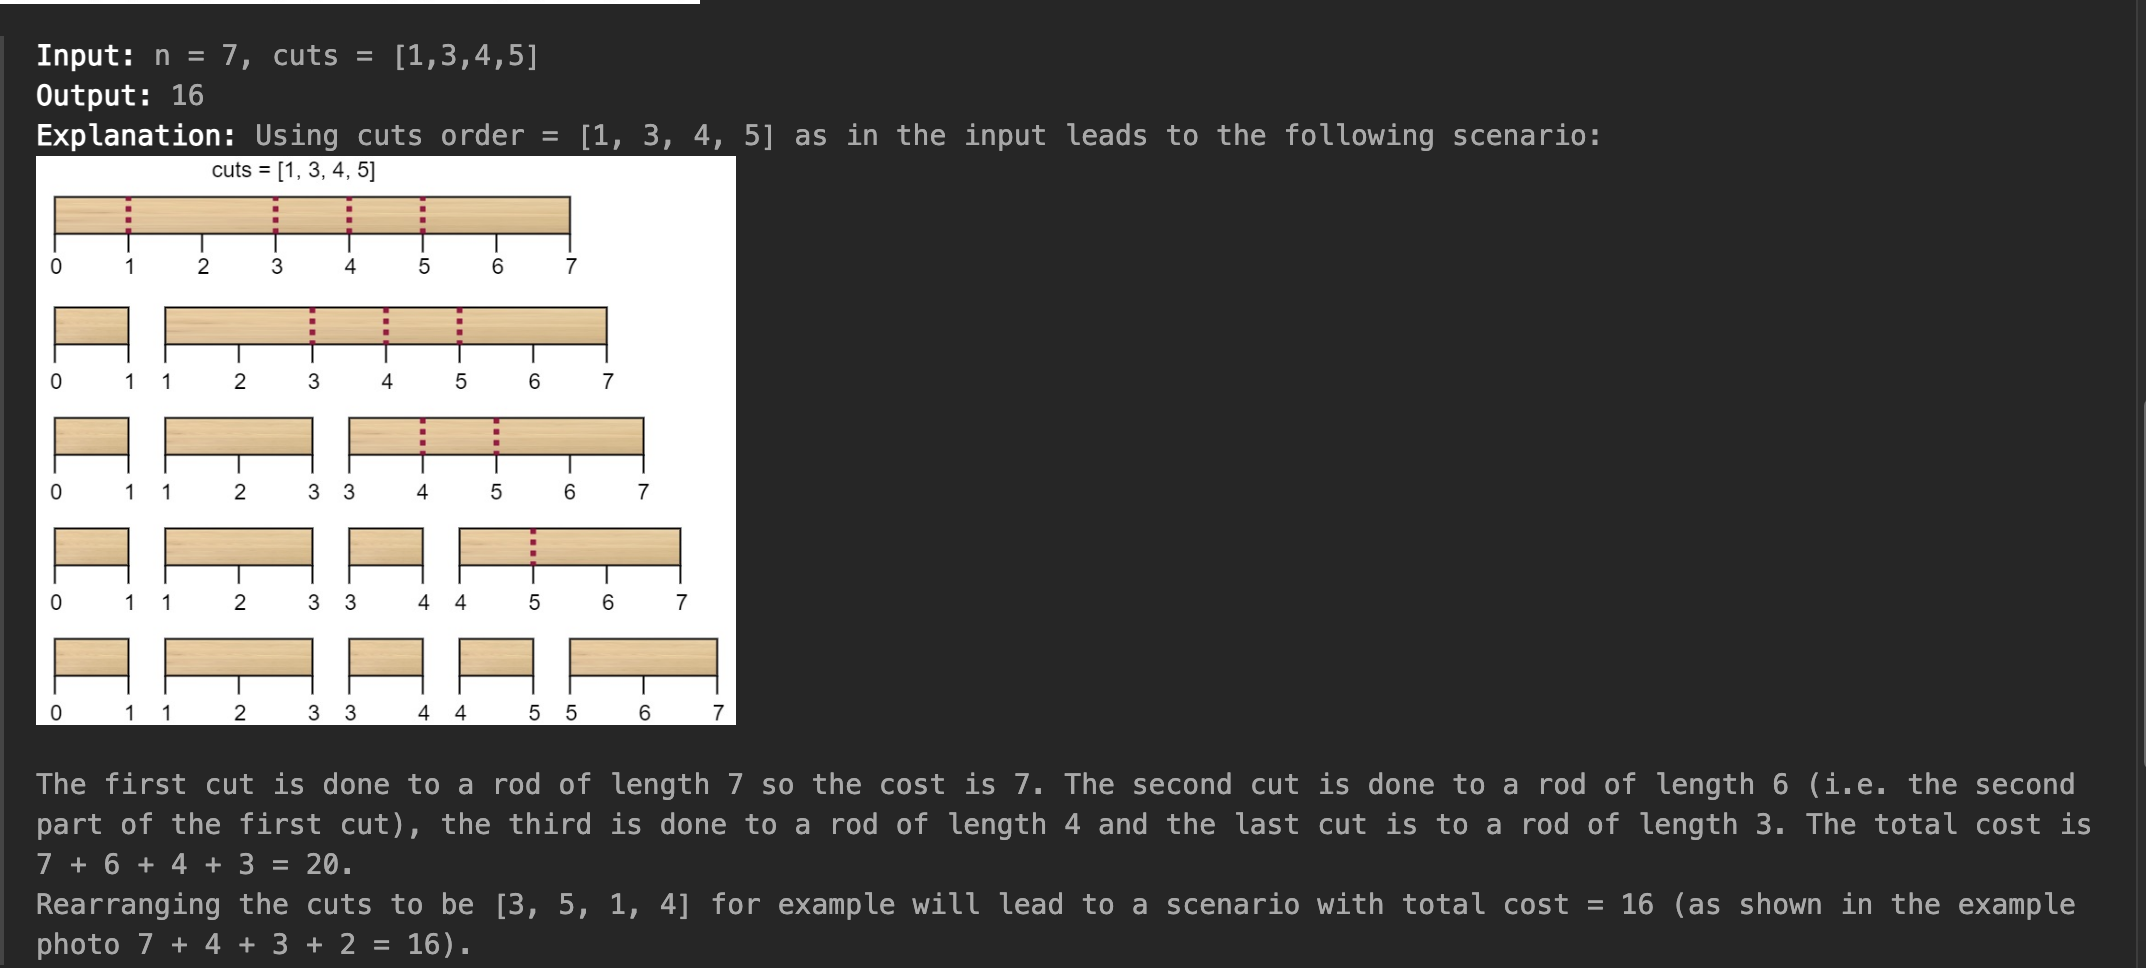

In [ ]:
class Solution {
    public:
    
        int f(int s, int e, vector<int> &v, vector<vector<int>> &mem){
            if(s>=e or e-s==1) return 0;
            if(mem[s][e]!=-1) return mem[s][e];
            int minn=INT_MAX;
            for(int splitPoint=s+1;splitPoint<e;splitPoint++){
                int cost=v[e]-v[s]+ f(s,splitPoint,v,mem)+ f(splitPoint,e,v,mem);
                minn= min(minn,cost); 
            }
            return mem[s][e]=minn;
        }
    
        int minCost(int origLen, vector<int>& v) {
            int n=v.size();
            sort(v.begin(),v.end());
            v.insert(v.begin(),0);
            v.push_back(origLen);
            //len become n+2 
            vector<vector<int>> mem(n+2,vector<int>(n+2,-1));   
            return f(0,n+1,v,mem);
        }
    };

In [ ]:
sort(v.begin(),v.end());
v.insert(v.begin(),0);
v.push_back(len);
vector<vector<int>> dp(n+2,vector<int>(n+2,0));
for(int i=0;i<=n;i++) dp[i][i+1]=0;

for(int len=2;len<=n+1;len++){
    for(int s=0;s+len<=n+1;s++){
        int e=s+len;
        int ans=INT_MAX;
          for(int splitPoint=s+1;splitPoint<e;splitPoint++){
            ans=min(ans,dp[s][splitPoint]+dp[splitPoint][e]+v[e]-v[s]);
          }
          dp[s][e]=ans;   
    }
}
return dp[0][n+1];


striver universal method?  
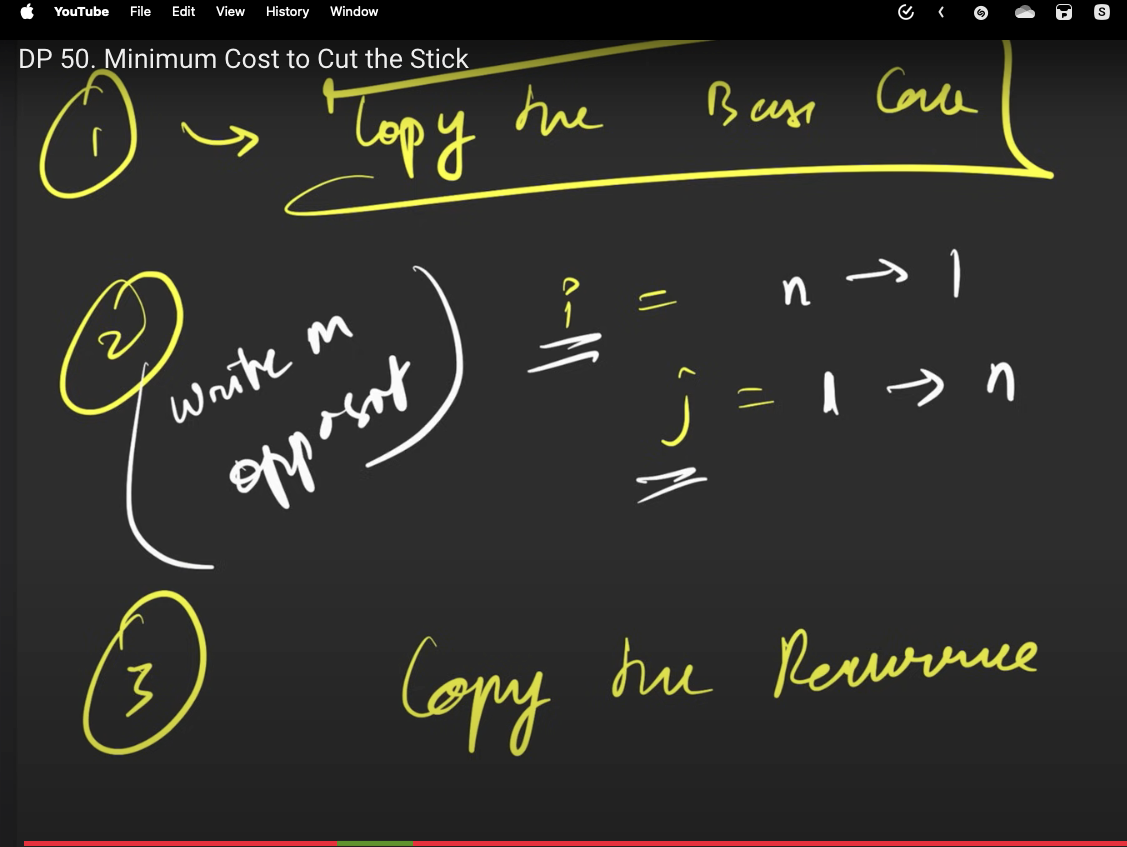

this is important point by striver, bottom up is filled opposite of top- bottom

burst balloon  
https://leetcode.com/problems/burst-balloons/description/  

In [ ]:
class Solution {
    public:
        int f(vector<int>& v, vector<vector<int>> &mem, int l, int r){
            if(l>r) return 0;
            if(mem[l][r]!=-1) return mem[l][r];
            int result=0;
            for(int i=l;i<=r;i++){
                int curr=v[l-1] * v[i] * v[r+1];
                int remain=f(v,mem,l,i-1)+f(v,mem,i+1,r);
                result=max(result, curr+ remain);
            }
            return mem[l][r]=result;
        }
    
    
        int maxCoins(vector<int>& v) {
            int n=v.size();
            v.insert(v.begin(),1);
            v.push_back(1);
            vector<vector<int>> mem(n+1, vector<int>(n+1, -1));
            return f(v,mem,1,n);
        }
    };

# FAANG

strasen multiplication

matrix expoenentiation in mathematics     
something related to it in fibonacci series